In [1]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import ContinuousSpace

In [256]:
def calculate_distance(pos1, pos2):
    # calculate distance from pos1 to pos2 along
    # circle
    return (pos2-pos1) % math.tau

class Car(Agent):
    
    @property
    def x(self):
        return math.cos(self.pos)
    
    @property
    def y(self):
        return math.sin(self.pos)
    
#     @property
#     def lookahead(self):
#         return 2*self.speed
    
    def __init__(self, unique_id, model, speed, acceleration, 
                 deceleration, pos):
        super().__init__(unique_id, model)
        self.speed = speed
        self.max_speed = speed
        self.acceleration = acceleration
        self.deceleration = deceleration
        self.lookahead = 2 * self.speed
        
        self.pos = pos
        self.pred = None

    def step(self):
        if calculate_distance(self.pos, self.pred.pos) < self.lookahead:
            speed = 0.9*self.pred.speed
        else:
            # speed up to max
            speed = min(self.max_speed, self.speed+self.acceleration)
        
        self.speed = speed
        
        self.pos += self.speed

class TrafficJamModel(Model):
        # have to change speed into angular speed
        # have to change accelration into angular acceleration
    
    def __init__(self, average_speed=0.1, n_agents=10,
                 acceleration=0.02, deceleration=0.02, seed=None):
        super().__init__(seed)
        self.schedule = RandomActivation(self)
        
        initial_positions = np.linspace(0, math.tau, n_agents+1)[0:-1]
        
        for i, pos in enumerate(initial_positions):
            initial_speed = self.random.gauss(average_speed, 0.02)
            
            agent = Car(i, self, initial_speed, acceleration, deceleration, 
                        pos)
            self.schedule.add(agent)
            
        for i, agent in enumerate(self.schedule.agents):
            try:
                agent.pred = self.schedule.agents[i+1]
            except IndexError:
                agent.pred = self.schedule.agents[0]
        
        
    def step(self):
        self.schedule.step()

In [277]:
model = TrafficJamModel(n_agents=37)
agents = model.schedule.agents



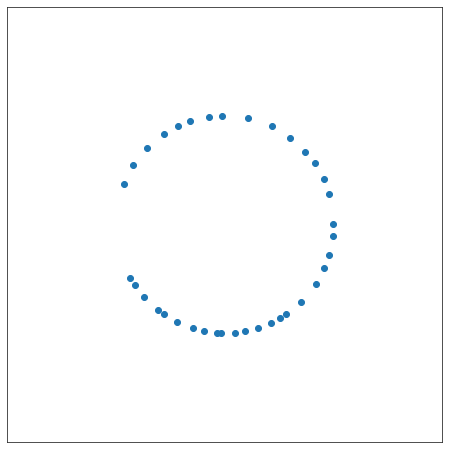

In [278]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from matplotlib import animation, rc, collections
from IPython.display import HTML

pos = np.asarray([[agent.x, agent.y] for agent in agents])

sns.set_style('white')

fig, ax = plt.subplots()
positions = ax.scatter(pos[0, :], pos[1, :])
ax.set_aspect('equal')
ax.set_xlim(xmin=-2, xmax=2)
ax.set_ylim(ymin=-2, ymax=2)
ax.set_xticks([])
ax.set_yticks([])

def update(frame):
    model.step()
    
    pos = np.asarray([[agent.x, agent.y] for agent in agents])
    
    positions.set_offsets(pos)
    return positions

anim = FuncAnimation(fig, update, frames=1000);
writervideo = animation.FFMpegWriter(fps=24) 
anim.save("cars.mp4", writer=writervideo)

In [279]:
from IPython.display import Video

Video("cars.mp4", width=600)